
# Project: No Show Appointment data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

###  Dataset Description 
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.<br>
#### these are what column means
>***PatientId***     
***AppointmentID***  
***Gender***           
***ScheduledDay***   tells us on what day the patient set up their appointment. <br>  
***AppointmentDay*** tells us on what day the patient should show .<br>
***Age***              
***Neighbourhood******   indicates the location of the hospital.<br>   
***Scholarship***      indicates whether or not the patient is enrolled in Brasilian welfare  program Bolsa Família. <br>
***Hipertension***   does the patient suffer from  Hipertension?<br>
***Diabetes***     does the patient suffer from Diabetes?<br>
***Alcoholism***    does the patient have alcoholism ?<br>
***Handcap***           
***SMS_received***     did the patient receive a sms what remind him of the appointment?<br>
***No-show***     did the patients show up to their appointments?<br>



### Questions for Analysis
<ul>
<li><a href="#Q3">Q1 : How is correlation between showing up at the appointment and Gender</a></li>
<li><a href="#Q4">Q2 : What are factors that are most impact on showing up?</a></li>
<li><a href="#Q5">Q3 : which day is common to not showing up ?</a></li>
<li><a href="#Q6">Q4 : Which city have most showing up of patients appointments?</a></li>
<li><a href="#Q7">Q5 : How is correlation between Age and showing up?</a></li>
</ul>

In [82]:
# Upgrading pandas
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [83]:
#import the main packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [84]:
# loadding the data from csv file to pandas dataframe
df = pd.read_csv('noshowappointments.csv')
# appeare 3 rows 
#the head of dataframe
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [85]:
# get the shape of dataframe
df.shape

(110527, 14)

In [86]:
# get descriptive stastics from the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [87]:
# get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [88]:
# get the number of nane values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [89]:
# get the number of duplicated rows
df.duplicated().sum()

0

In [90]:
# get the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning


In [91]:
# drop columns that we will not use
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis = 1, inplace = True)

In [92]:
# drop duplicated rows
df.drop_duplicates(inplace = True)

In [93]:
# covert data type of column of date to datetime then week day name
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

In [94]:
# convert all of value from booleans columns to remove outliers
coln = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for c in coln:
    df[c] = df[c].astype('bool')
    df[c].replace({False: 0, True: 1}, inplace=True)

In [95]:
# replace No-show (column name) to show
new_labels = []
for col in df.columns:
    if 'No-' in col:
        new_labels.append(col.replace('No-show','Show'))
    elif 'Hipertension' in col:
        new_labels.append(col.replace('Hipertension','Hypertension'))
    #correct spelling Handcap to Handicap
    elif 'Handcap' in col:
        new_labels.append(col.replace('Handcap','Handicap'))
    else:
        new_labels.append(col)
df.columns = new_labels
# puting show instead of No and no_show instead of Yes 
df['Show'].replace({'No': 'show', 'Yes': 'no_show'}, inplace=True)
# set up new numeric column for Show to calculate pearson correlation
df['Show_lo']= df['Show'].replace({'show': 1, 'no_show': 0})
# set up new numeric column for Gender to calculate pearson correlation
df['Gender_lo']= df['Gender'].replace({'M': 1, 'F': 0})
df.head(5)


,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Show_lo,Gender_lo
0,F,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,show,1,0
1,M,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,show,1,1
2,F,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,show,1,0
3,F,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,show,1,0
4,F,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,show,1,0


##### The summary of data cleaning
> <ol>
    <li>drop columns that we will not use (PatientId, AppointmentID, ScheduledDay)
    <li>drop duplicated rows
    <li>covert data type of column of date to datetime then week day name
    <li>convert all of value from logical columns (sms recieved)<br> to boolean to remove outliers , then to int.
    <li>rename No-show column to Show.
    <li>correct spelling Handcap to Handicap
    <li>correct spelling Hipertension column to Hypertension
    <li>puting show instead of No and no_show instead of Yes .
    <li>set up new numeric(int) column for Show to calculate pearson correlation .
    <li>set up new numeric(int) column for Gender to calculate pearson correlation

     
  <ol/>


<a id='eda'></a>
## Exploratory Data Analysisdd

In [96]:
# y_show is defined variable as getting showing up
# not_show is defined variable as getting not showing up
y_show = df.Show == 'show'
not_show = df.Show == 'no_show'

In [97]:
#query by query method
#query no showing up case
non_show = df.query('Show == "no_show"')
#query no showing up case
show = df.query('Show == "show"')

<a id='Q3'></a>
### Q1 : How is correlation between showing up at the appointment and Gender?

Text(0.5,1,'Gender and Show')

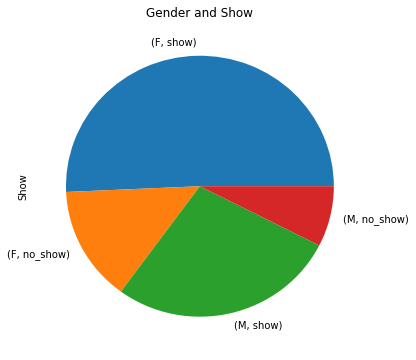

In [98]:

df.groupby('Gender')['Show'].value_counts().plot.pie(figsize=(6,6));
plt.title('Gender and Show')

In [99]:
#the difference between the ratio of no show to show with females and the ratio of no show to show with males
i ='Gender'
z1=(non_show.query('{} == "F"'.format(i))['{}'.format(i)].count())
r1=z1/(show.query('{} == "F"'.format(i))['{}'.format(i)].count())
# Calculate the ratio between no showing and showing up with not statue met.
z2=(non_show.query('{} == "M"'.format(i))['{}'.format(i)].count())
r2=z2/(show.query('{} == "M"'.format(i))['{}'.format(i)].count())
# Calculate the strength of correlation between no showing and statue met.
(r1-r2)*100

0.9387211581005306

In [100]:
r1*100

28.12163170549706

In [101]:
r2*100

27.182910547396528

#####  Gender
it does not have a Significant effect on **showing up**<br>
**the ratio** of no show to show with **Famales** is **28.12%**<br>
**the ratio** of no show to show with **Males** is **27.18%**<br>
**the difference between them** is **0.93%**<br>

#####  Gender :
we can see more that 0.5 of pie for famales <br> but when calculating the ratios showing up<br> and not for males and female , We find that<br> the ratios are very close, and the difference between<br> them is less than one percent
So the correletion is <br>weak between showing up and gender. 

<a id='Q4'></a>
###  Q2 : What are factors that are most impact on showing up?


In [102]:
# defining a function to graph the correlation between show and the factors
def graph(prop):
    '''function to graph the correlation between show and the factors
    ,prop is name of factor'''
    colors = ['red', 'yellow']
    c = df.groupby('Show')['{}'.format(prop)].value_counts()
    c.plot(kind='bar',title='{}'.format(prop), color=colors, alpha=.5);
    plt.xlabel('Show and {}'.format(prop),size='14')
    plt.ylabel('counts',size='14')


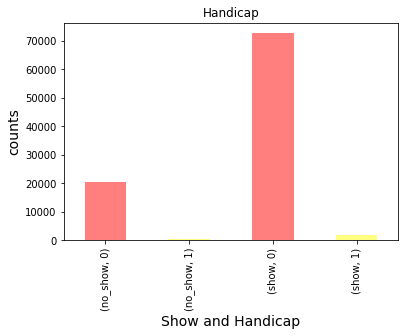

In [103]:
# graph the correlation between show and Handicap factor..
graph('Handicap')

#####  Handicap
.<br>
**the ratio** of no show to show without **Handicap** is **27.9%**<br>
**the ratio** of no show to show with **Handicap** is **21.58%**<br>
**the difference between them** is **-6.35%**<br>
**This means that patients ratio whose Handicap is more showing up by 6.35 per percent**

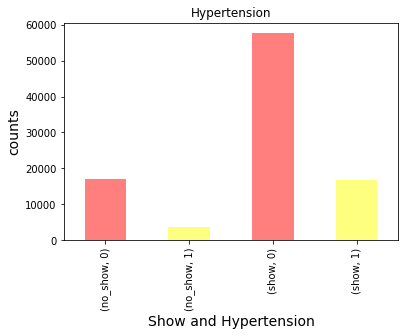

In [104]:
# graph the correlation between show and Hypertension factor..
graph('Hypertension')

#####  Hypertension
<br>
**the ratio** of no show to show without **Hypertension** is **29.59%**<br>
**the ratio** of no show to show with **Hypertension** is **21.6%**<br>
**the difference between them** is **-7.96%**<br>
**This means that patients ratio whose Hypertension is more showing up by 7.96 per percent**

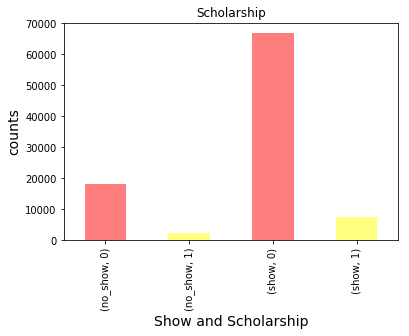

In [105]:
# graph the correlation between show and Hypertension factor..
graph('Scholarship')

#####  Scholarship
**the ratio** of no show to show without **Scholarship** is **27.3%**<br>
**the ratio** of no show to show with **Scholarship** is **32%**<br>
**the difference between them** is **4.75%**<br>
**This means that patients ratio whose Scholarships is more not showing up by 4.75 per percent**

Unexpectedly, those who have health insurance from the state,<br> their commitment to appointments in clinics decreases

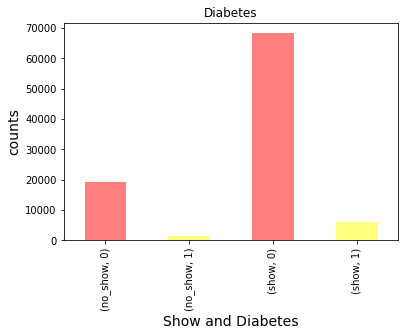

In [106]:
graph('Diabetes')

#####  Diabetes
**the ratio** of no show to show without **Diabetes** is **28.2%**<br>
**the ratio** of no show to show with **Diabetes** is **22.7%**<br>
**the difference between them** is **-5.5%**<br>
**This means that patients ratio whose Diabetes is more showing up by 5.5 per percent**

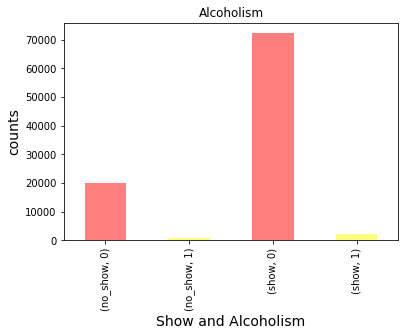

In [107]:
graph('Alcoholism')

#####  Alcoholism
it does not have a Significant effect on **showing up**, <br> because the rate of patients who have **Alcoholism**,have heath care less.<br>then they do not have a lot of appointments<br> 
**the ratio** of no show to show without **Alcoholism** is **27.7%**<br>
**the ratio** of no show to show with **Alcoholism** is **28.7%**<br>
**the difference between them** is **0.99%**<br>

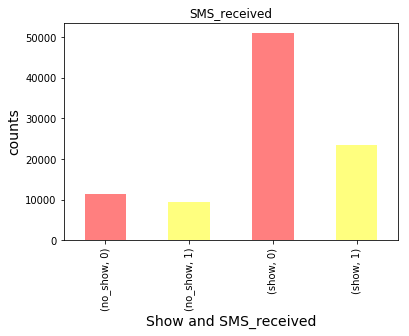

In [108]:
graph('SMS_received')

#####  SMS_received
there is a Significant effect between **showing up and SMS_received**, <br>.<br>
**the ratio** of no show to show without **SMS_received** is **22.2**<br>
**the ratio** of no show to show with **SMS_received** is **39.9%**<br>
**the difference between them** is **17.75%**<br><br>
**This means that patients who recieved sms is more not showing up by 17.75%**

In [109]:
#ratios between factors and showing up
li_r1_factor_met= {}
li_r2_no_factor= {}
defrence_r1_r2 = {}
# the strength of correlation
# Calculate the ratio between no showing and showing up with statue met.
column = ['Scholarship','Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
for i in column:
    r1=(non_show.query('{} == 1'.format(i))['{}'.format(i)].count())/(show.query('{} == 1'.format(i))['{}'.format(i)].count())
    # Calculate the ratio between no showing and showing up with not statue met.
    r2=(non_show.query('{} == 0'.format(i))['{}'.format(i)].count())/(show.query('{} == 0'.format(i))['{}'.format(i)].count())
    # Calculate the strength of correlation between no showing and statue met.
    defrence_r1_r2['{}'.format(i)] = (r1-r2)*100
    li_r1_factor_met['{}'.format(i)]= r1*100
    li_r2_no_factor['{}'.format(i)]= r2*100


In [110]:
li_r1_factor_met

{'Scholarship': 32.05816847897288,
 'Hypertension': 21.629330322657317,
 'Diabetes': 22.72210492122787,
 'Alcoholism': 28.760476400529335,
 'Handicap': 21.582315299592786,
 'SMS_received': 39.967519979486305}

In [111]:
li_r2_no_factor

{'Scholarship': 27.3037440517164,
 'Hypertension': 29.590491063682112,
 'Diabetes': 28.248074726947962,
 'Alcoholism': 27.760693705673763,
 'Handicap': 27.93786087434699,
 'SMS_received': 22.211124167645906}

In [112]:
defrence_r1_r2

{'Scholarship': 4.754424427256482,
 'Hypertension': -7.961160741024795,
 'Diabetes': -5.525969805720093,
 'Alcoholism': 0.9997826948555721,
 'Handicap': -6.355545574754201,
 'SMS_received': 17.7563958118404}

In [113]:
# calculate pearson correlation
# Calculate the ratio between no showing and showing up with statue met.
pearson_corr = {}
column = ['Scholarship','Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','Gender_lo']
for i in column:
    cor = df['{}'.format(i)].corr(df.Show_lo,method='pearson')  
    pearson_corr['{}'.format(i)] = cor
pearson_corr

{'Scholarship': -0.021098168732383377,
 'Hypertension': 0.05030994049196688,
 'Diabetes': 0.023011908649390077,
 'Alcoholism': -0.0025404793295180396,
 'Handicap': 0.014516848627718189,
 'SMS_received': -0.11955136511973068,
 'Gender_lo': 0.006662500480057284}

each one from pearson correlation between the factor and showing up<br. is not strong ,<br>but SMS_received is the most strong correlation

<a id='Q5'></a>
### Q3 : which day is common to not showing up of appointments?

Text(0.5,1,'AppointmentDay and showing up')

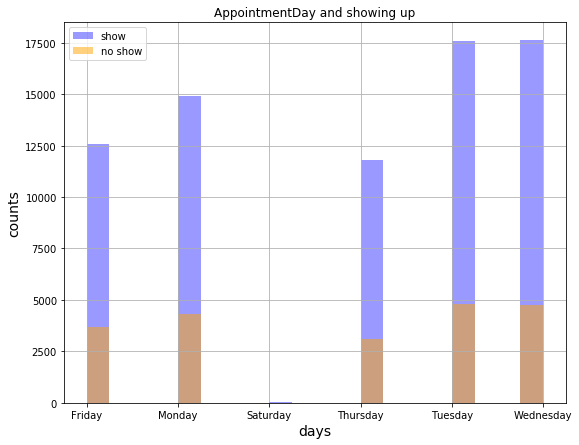

In [114]:
f1 = df.AppointmentDay[y_show]
f2 = df.AppointmentDay[not_show]
f1.hist(alpha=0.4, bins=20, label='show',color='blue',figsize=(9,7))
f2.hist(alpha=0.5, bins=20, label='no show',color='orange',figsize=(9,7))
plt.legend();
plt.xlabel('days',size='14')
plt.ylabel('counts',size='14')
plt.title('AppointmentDay and showing up')

In [115]:
df.AppointmentDay[df.Show == 'no_show'].mode()

0    Tuesday
dtype: object

<a id='Q6'></a>
### Q4 : Which city have most showing up of patients appointments?

Text(0.5,1,'Neighbourhood and showing up')

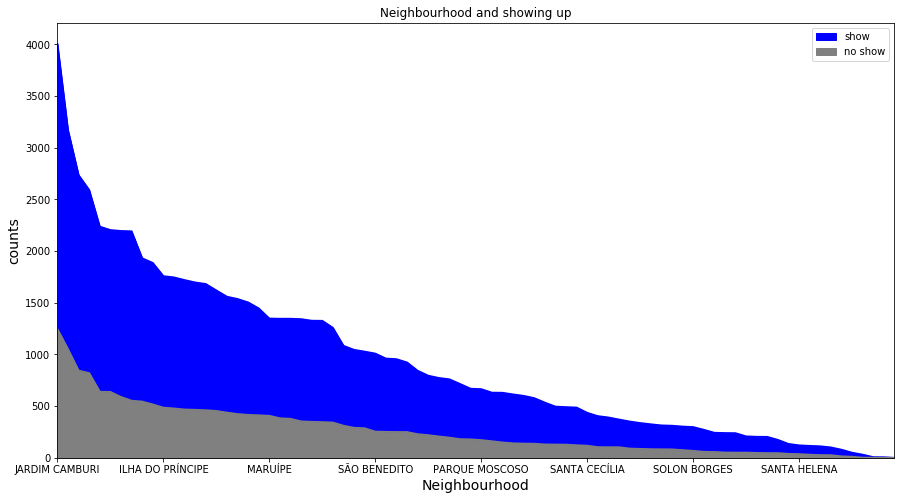

In [116]:
f1 = df.Neighbourhood[y_show].value_counts()
f2 = df.Neighbourhood[not_show].value_counts()
f1.plot(kind='area',figsize=(15,8),label='show',color='blue')
f2.plot(kind='area',figsize=(15,8),label='no show',color='gray')
plt.legend()
plt.xlabel('Neighbourhood',size='14')
plt.ylabel('counts',size='14')
plt.title('Neighbourhood and showing up')

In [117]:
df.Neighbourhood[y_show].mode()

0    JARDIM CAMBURI
dtype: object

#####  Neighbourhood :
we can see that the greates difference is between number of patients who <br>
do not showed up and who shwed up is from JARDIM CAMBURI .<br>
**seems too to this correlation is the most correlation of all factors**

<a id='Q7'></a>
### Q5 : How is correlation between Age and showing up?

Text(0.5,1,'Age and showing up')

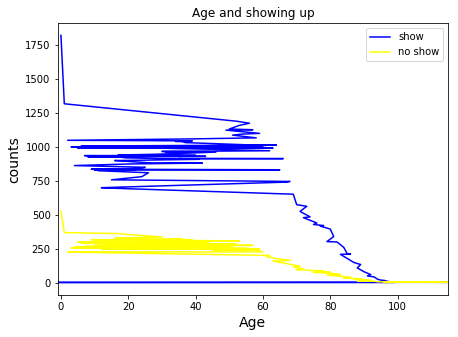

In [118]:
age_yes = df.Age[y_show].value_counts()
age_no = df.Age[not_show].value_counts()
age_yes.plot(kind='line',label='show',color='blue',figsize=(7,5))
age_no.plot(kind='line',label='no show',color='yellow',figsize=(7,5))
plt.legend();
plt.xlabel('Age',size='14')
plt.ylabel('counts',size='14')
plt.title('Age and showing up')

In [119]:
age_yes.describe()

count     104.000000
mean      715.951923
std       393.136242
min         1.000000
25%       419.000000
50%       877.000000
75%       990.250000
max      1821.000000
Name: Age, dtype: float64

In [120]:
age_no.describe()

count    100.000000
mean     206.930000
std      118.892639
min        1.000000
25%       88.500000
50%      253.500000
75%      297.000000
max      526.000000
Name: Age, dtype: float64

**the correlation of age with showing up is not orgnised**
**the age consist of 3 groups**<br>
**group 1** **from age of 57 to up** : this are skwed to right.<br> the correlation between age and showing up is <br>continuos and negative while it decrease when age increase.<br>
**group 2** **from age of 29 Approximately to 56** : this age rate<br> does not have a significant effect on showing up.<br>
**group 3** **from age of start to 28** : show only are skwed to right<br> while no show are Approximately fixed ,this means that ratio of no show becomming bigger with age incease.

<a id='conclusions'></a>
## Conclusions

##### Answers :
<ul>
     <li> The answer of Q1 : How is correlation between showing up at the<br> appointment and Gender?  <br>We find that the ratios are very close, and the difference between<br> them is less than one percent Gender seems to does not havebr> a Significant impact on showing up .
     <li> The answer of Q2 : What are factors that are most impact on showing up?<br>
          using pearson correlation rates , seems to SMS_received is the most negative<br> correlation, that means patients who showing up are less when they recieves sms to remind them.
     <li> The answer of Q3 : which day is common to be not showing up ?<br>
         using mode , the common day to be not showing up from the patient is Tuesday<br>
         although saturday seems to be it ,but it is holiday, Tuesday is the day when <br>
         ratio of appointments that are not showing up become more.
     <li> The answer of Q4 : Which city have most showing up of patients appointments?<br>
         <em>JARDIM CAMBURI<em/> is the city that contain the most ratio of showing up.<br>Neighbourhood
seems too to this correlation is the most correlation of all factors correlation with showing up.
     <li> The answer of Q5 : How is correlation between Age and showing up?<br>
        <ol>Age consists of 3 groups:
             <li>(from age of 57 to up) : the correlation between age and showing up is <br>continuos and negative while it decrease when age increase.<br>
             <li>(from age of 29 Approximately to 56) :this age rate<br> does not have a significant effect on showing up.<br>
             <li>(from age of start to 28) : this means that ratio of no show becomming bigger with age incease.
         <ol/>
         

<ul/> 
         


#### Limitations :

##### pearson correlation to measure the strength of bonding between showing up and factors
<ul>
    <li>for Scholarship = -0.021098168732383377
    <li>for Hypertension = 0.05030994049196688
    <li>for Diabetes = 0.023011908649390077
    <li>for Alcoholism =  -0.0025404793295180396
    <li>for Handicap = 0.014516848627718189
    <li>for SMS_received = -0.11955136511973068
    <li>for Gender M = 0.006
<ul/>

##### the ratio of no show to show with factor met
<ul>
    <li>for Scholarship = 32%
    <li>for Hypertension = 21.6%
    <li>for Diabetes = 22.7%
    <li>for Alcoholism = 28.76%
    <li>for Handicap = 21.58%
    <li>for SMS_received = 39.96%
<ul/>

##### the ratio of no show to show with not factor met
<ul>
    <li>for Scholarship = 27.3%
    <li>for Hypertension = 29.59%
    <li>for Diabetes = 28.2%
    <li>for Alcoholism = 27.7%
    <li>for Handicap = 27.9%
    <li>for SMS_received = 22.2%
<ul/>

##### difference between the ratio of no show to show with factor met<br> and the ratio of no show to show with not factor met
<ul>
    <li>for Scholarship = 4.75%
    <li>for Hypertension = -7.96%
    <li>for Diabetes = -5.5%
    <li>for Alcoholism = 0.99%
    <li>for Handicap = -6.35%
    <li>for SMS_received = 17.75%
<ul/>
negative ratio is indice to the more of showing up<br>
possitive ratio is indice to the more of not showing up<br>

        

##### Answers and Limitations summery (Results) :
<ul>
    <li>Neighbourhood is The most effective factor on attendance
    <li>the rate of patients who have Alcoholism,heath care is very small.
    <li> Gender seems to does not has a Significant impact on showing up .
    <li> Neighbourhood seems to have continuoun effect on<br> showing up of the appointments.
    <li> away from Neighbourhood the factor that has the most negative<br> impact on attendance at the appointment is sms received, followed by Scholarship.
    <li>The most positive effective factor on attendance after Neighbourhood is <br>Hypertension . followed by Diabetes then Handicap.
    <li> Age : (a) before 29 while age increase , no showing icreases .<br>
        (b) from 29 to before 57 : the effect of age become weak.<br>
        (c) above 57 that is maximum of showing and count of appointments <br> the ratio of no showing up of appointments to showing up increases but less than group (a).
<ul/>

In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0